In [1]:
# Import Libaries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
data = {
    'job_skills': ['python', 'sql', 'java', 'c++', 'c#', 'javascript', 'html', 'css', 'php', 'ruby'],
    'skill_count': [30, 25, 20, 15, 10, 5, 4, 3, 2, 1],
    'skill_pay': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
}

df_eg = pd.DataFrame(data) # transform the dictionary 'data' into a DataFrame 

<Axes: xlabel='skill_count', ylabel='skill_pay'>

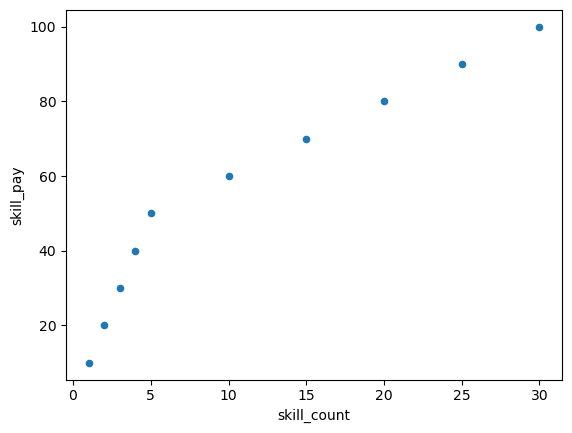

In [6]:
df_eg.plot(kind='scatter', x='skill_count', y='skill_pay')

In [9]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [10]:
df_DA.sample()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
133948,Data Analyst,Business Intelligence Engineer,Anywhere,via LinkedIn,Full-time,True,Romania,2023-06-06 08:23:28,False,False,Romania,None,NaN,NaN,Luxoft,"[sql, sql server, azure, snowflake, databricks...","{'analyst_tools': ['power bi', 'dax'], 'cloud'..."


In [11]:
df_explode = df_DA.explode('job_skills')

In [25]:
df_skill_stats = df_explode.groupby('job_skills').agg(
                        skill_count=('job_skills', 'count'),
                        median_salary=('salary_year_avg', 'median')
                ) # using a dictonary to find key values to define how to do our aggregation

df_skill_stats = df_skill_stats.sort_values(by='skill_count', ascending=False).head(10)

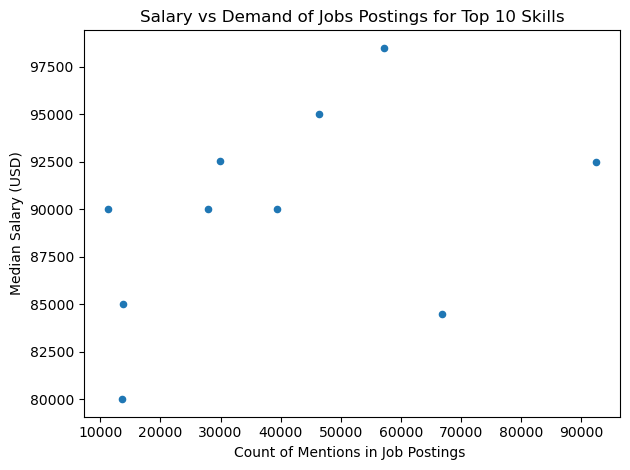

In [28]:
df_skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Mentions in Job Postings ')
plt.ylabel('Median Salary (USD)')
plt.title('Salary vs Demand of Jobs Postings for Top 10 Skills')
plt.tight_layout()
plt.show() # this gets us the graph with no labels. Getting labels is easier with Seaborn library. but .text with matplotlib

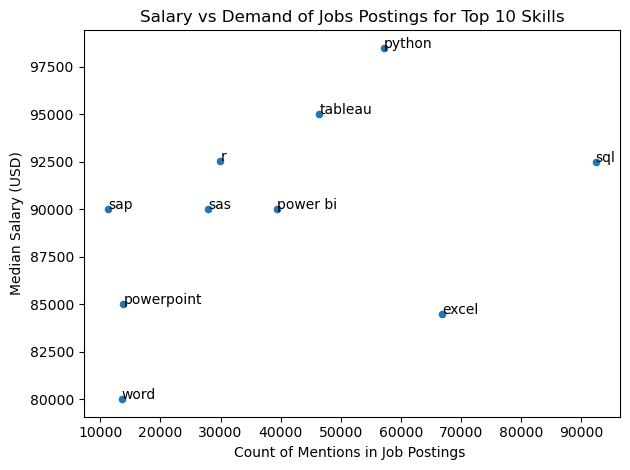

In [41]:
df_skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Mentions in Job Postings ')
plt.ylabel('Median Salary (USD)')
plt.title('Salary vs Demand of Jobs Postings for Top 10 Skills')
plt.tight_layout()

# Use a loop function to iterate through the .head(10) df to give us the location of each point on the graph.
for i, txt in enumerate(df_skill_stats.index):
    plt.text(df_skill_stats['skill_count'].iloc[i], df_skill_stats['median_salary'].iloc[i], txt)


plt.show()


In [38]:
for i, txt in enumerate(df_skill_stats.index):
    plt.text(df_skill_stats['skill_count'].iloc[i], df_skill_stats['median_salary'].iloc[i], txt)

ValueError: Image size of 45844359x36405654 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>